In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('C:\Users\Shubhanshu\Desktop\dataset_1.csv')

In [3]:
print data.head()

   Unnamed: 0            Timestamp  Voltage_MEAN  Frequency_MEAN  \
0           0  2015-08-01 00:04:00    244.966707       49.992467   
1           1  2015-08-01 00:09:00    246.946993       49.924533   
2           2  2015-08-01 00:14:00    246.968218       49.978235   
3           3  2015-08-01 00:34:00    250.798191       49.960229   
4           4  2015-08-01 00:39:00    247.282393       49.931400   

   Active Power_MEAN  
0         888.608424  
1         906.270721  
2         913.466885  
3          59.063705  
4         769.706385  


In [4]:
print '\n Data Types:'
print data.dtypes


 Data Types:
Unnamed: 0             int64
Timestamp             object
Voltage_MEAN         float64
Frequency_MEAN       float64
Active Power_MEAN    float64
dtype: object


In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv('C:\Users\Shubhanshu\Desktop\dataset_1.csv', parse_dates='Timestamp', index_col='Timestamp',date_parser=dateparse)
print data.head()

                     Unnamed: 0  Voltage_MEAN  Frequency_MEAN  \
Timestamp                                                       
2015-08-01 00:04:00           0    244.966707       49.992467   
2015-08-01 00:09:00           1    246.946993       49.924533   
2015-08-01 00:14:00           2    246.968218       49.978235   
2015-08-01 00:34:00           3    250.798191       49.960229   
2015-08-01 00:39:00           4    247.282393       49.931400   

                     Active Power_MEAN  
Timestamp                               
2015-08-01 00:04:00         888.608424  
2015-08-01 00:09:00         906.270721  
2015-08-01 00:14:00         913.466885  
2015-08-01 00:34:00          59.063705  
2015-08-01 00:39:00         769.706385  


In [7]:
data.index

DatetimeIndex(['2015-08-01 00:04:00', '2015-08-01 00:09:00',
               '2015-08-01 00:14:00', '2015-08-01 00:34:00',
               '2015-08-01 00:39:00', '2015-08-01 00:44:00',
               '2015-08-01 00:49:00', '2015-08-01 00:54:00',
               '2015-08-01 00:59:00', '2015-08-01 01:04:00',
               ...
               '2015-09-09 03:34:00', '2015-09-09 03:39:00',
               '2015-09-09 03:44:00', '2015-09-09 03:49:00',
               '2015-09-09 03:54:00', '2015-09-09 03:59:00',
               '2015-09-09 04:04:00', '2015-09-09 04:09:00',
               '2015-09-09 04:14:00', '2015-09-09 04:19:00'],
              dtype='datetime64[ns]', name=u'Timestamp', length=10000, freq=None)

In [8]:
ts = data['Voltage_MEAN']
ts.head(10)

Timestamp
2015-08-01 00:04:00    244.966707
2015-08-01 00:09:00    246.946993
2015-08-01 00:14:00    246.968218
2015-08-01 00:34:00    250.798191
2015-08-01 00:39:00    247.282393
2015-08-01 00:44:00    243.640180
2015-08-01 00:49:00    241.102260
2015-08-01 00:54:00    243.974060
2015-08-01 00:59:00    245.114687
2015-08-01 01:04:00    243.751913
Name: Voltage_MEAN, dtype: float64

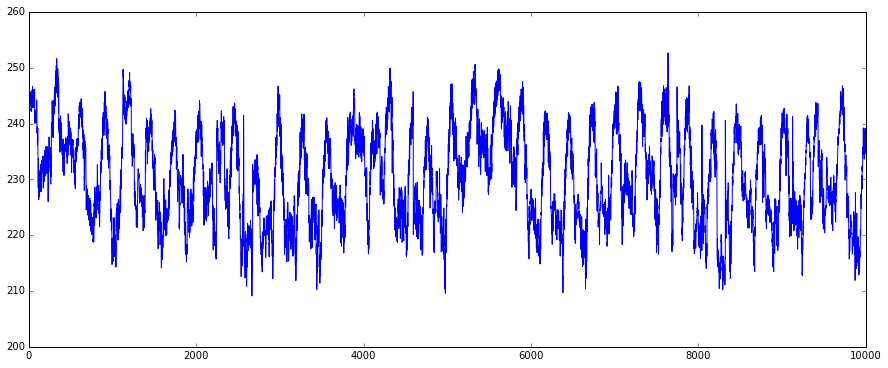

In [9]:
plt.plot(ts)

In [10]:
#Function for testing stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

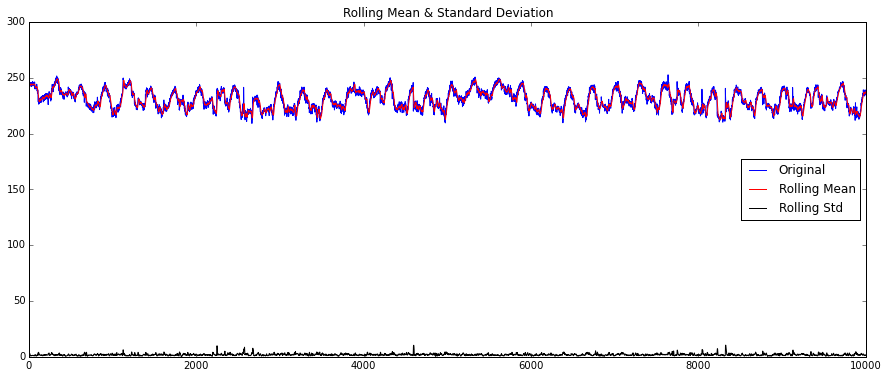

Results of Dickey-Fuller Test:
Test Statistic                -9.737430e+00
p-value                        8.674727e-17
#Lags Used                     3.800000e+01
Number of Observations Used    9.961000e+03
Critical Value (5%)           -2.861830e+00
Critical Value (1%)           -3.431007e+00
Critical Value (10%)          -2.566924e+00
dtype: float64


In [12]:
test_stationarity(ts)

In [13]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [15]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

NameError: name 'ts_log_diff' is not defined

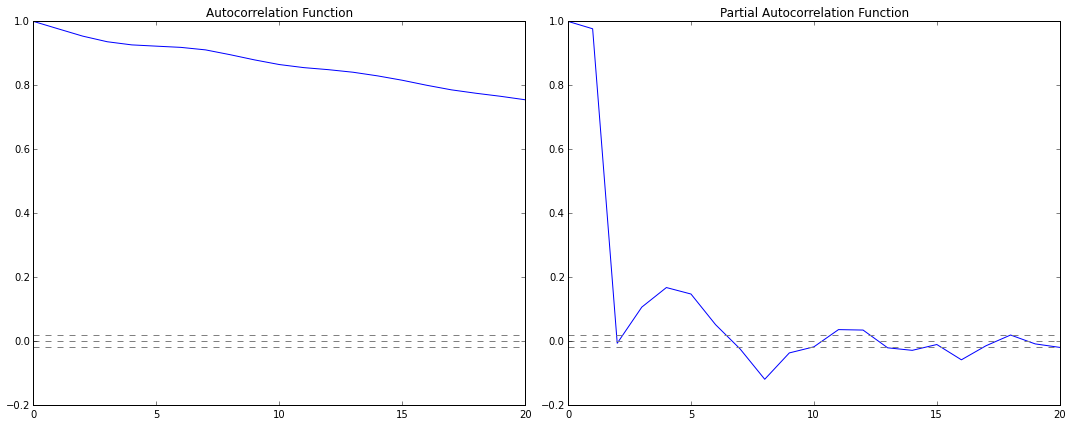

In [16]:
lag_acf = acf(ts, nlags=20)
lag_pacf = pacf(ts, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

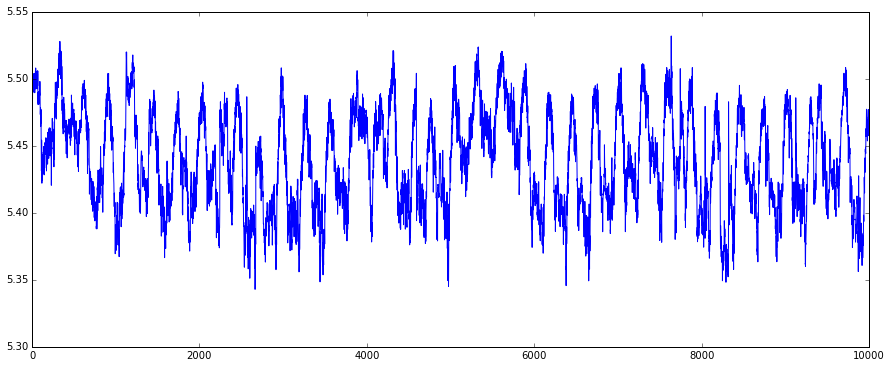

In [17]:
ts_log = np.log(ts)
plt.plot(ts_log)

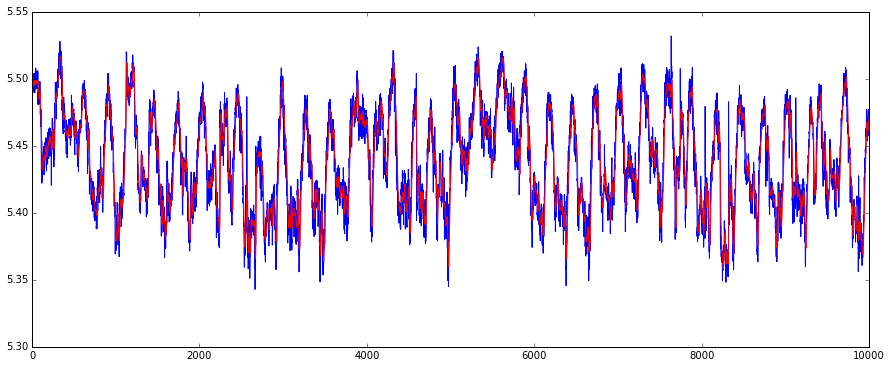

In [18]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [19]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Timestamp
2015-08-01 00:04:00         NaN
2015-08-01 00:09:00         NaN
2015-08-01 00:14:00         NaN
2015-08-01 00:34:00         NaN
2015-08-01 00:39:00         NaN
2015-08-01 00:44:00         NaN
2015-08-01 00:49:00         NaN
2015-08-01 00:54:00         NaN
2015-08-01 00:59:00         NaN
2015-08-01 01:04:00         NaN
2015-08-01 01:09:00         NaN
2015-08-01 01:14:00   -0.011185
Name: Voltage_MEAN, dtype: float64

In [20]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Timestamp
2015-08-01 01:14:00   -0.011185
2015-08-01 01:19:00   -0.009368
2015-08-01 01:24:00   -0.008352
2015-08-01 01:29:00   -0.003152
2015-08-01 01:34:00   -0.000719
Name: Voltage_MEAN, dtype: float64

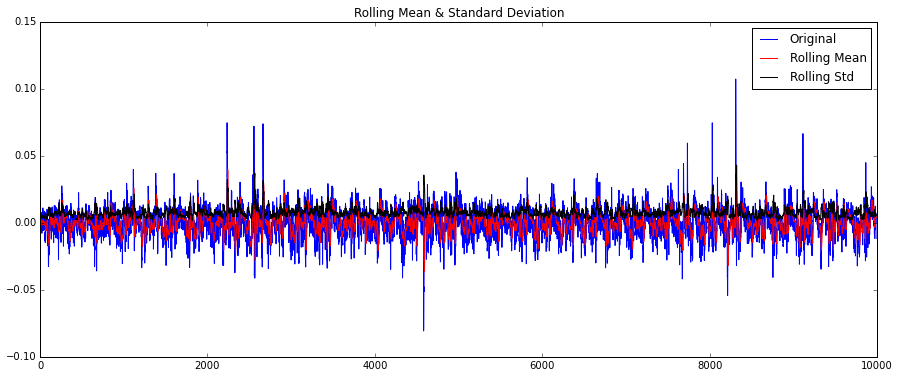

Results of Dickey-Fuller Test:
Test Statistic                -1.588828e+01
p-value                        8.599295e-29
#Lags Used                     2.800000e+01
Number of Observations Used    9.960000e+03
Critical Value (5%)           -2.861830e+00
Critical Value (1%)           -3.431007e+00
Critical Value (10%)          -2.566924e+00
dtype: float64


In [21]:
test_stationarity(ts_log_moving_avg_diff)

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index

In [27]:
ts_log.head(12)

Timestamp
2015-08-01 00:04:00    5.501122
2015-08-01 00:09:00    5.509174
2015-08-01 00:14:00    5.509260
2015-08-01 00:34:00    5.524649
2015-08-01 00:39:00    5.510531
2015-08-01 00:44:00    5.495692
2015-08-01 00:49:00    5.485221
2015-08-01 00:54:00    5.497062
2015-08-01 00:59:00    5.501726
2015-08-01 01:04:00    5.496151
2015-08-01 01:09:00    5.493737
2015-08-01 01:14:00    5.490010
Name: Voltage_MEAN, dtype: float64

In [28]:
ts_log.shift()

Timestamp
2015-08-01 00:04:00         NaN
2015-08-01 00:09:00    5.501122
2015-08-01 00:14:00    5.509174
2015-08-01 00:34:00    5.509260
2015-08-01 00:39:00    5.524649
2015-08-01 00:44:00    5.510531
2015-08-01 00:49:00    5.495692
2015-08-01 00:54:00    5.485221
2015-08-01 00:59:00    5.497062
2015-08-01 01:04:00    5.501726
2015-08-01 01:09:00    5.496151
2015-08-01 01:14:00    5.493737
2015-08-01 01:19:00    5.490010
2015-08-01 01:24:00    5.490982
2015-08-01 01:29:00    5.490436
2015-08-01 01:34:00    5.494397
2015-08-01 01:39:00    5.494301
2015-08-01 01:44:00    5.502678
2015-08-01 01:49:00    5.494710
2015-08-01 01:54:00    5.494876
2015-08-01 01:59:00    5.496214
2015-08-01 02:04:00    5.499344
2015-08-01 02:09:00    5.500933
2015-08-01 02:14:00    5.504001
2015-08-01 02:19:00    5.496983
2015-08-01 02:24:00    5.495493
2015-08-01 02:29:00    5.495501
2015-08-01 02:34:00    5.503706
2015-08-01 02:39:00    5.494973
2015-08-01 02:44:00    5.493741
                         ...  

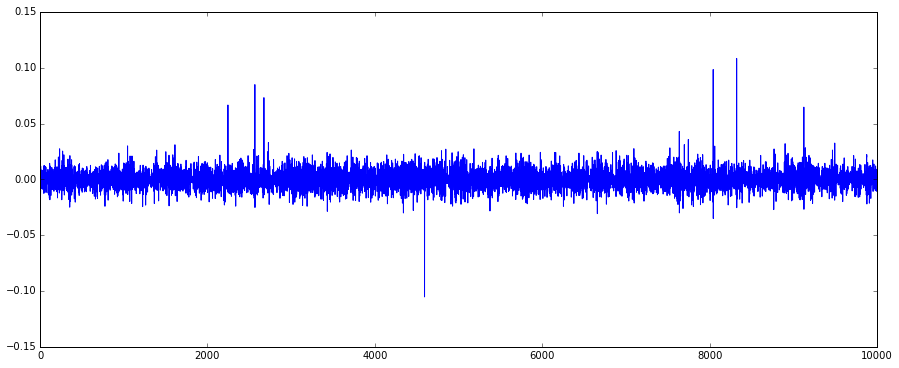

In [29]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

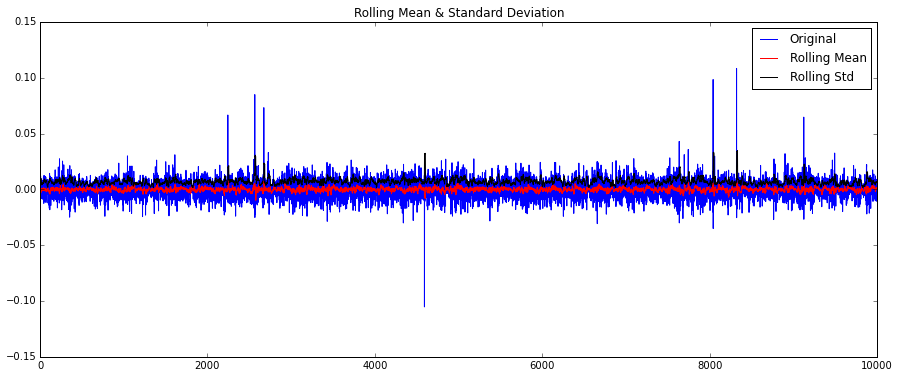

Results of Dickey-Fuller Test:
Test Statistic                  -24.059928
p-value                           0.000000
#Lags Used                       16.000000
Number of Observations Used    9982.000000
Critical Value (5%)              -2.861830
Critical Value (1%)              -3.431005
Critical Value (10%)             -2.566924
dtype: float64


In [30]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [31]:
###Aaand differencing worked like a charm..

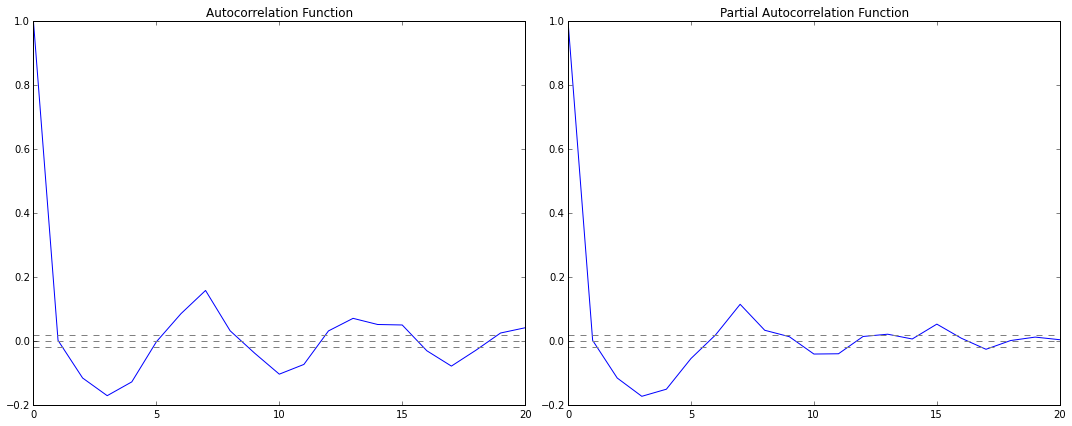

In [32]:
#Implementing the ACF and PACF plots
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

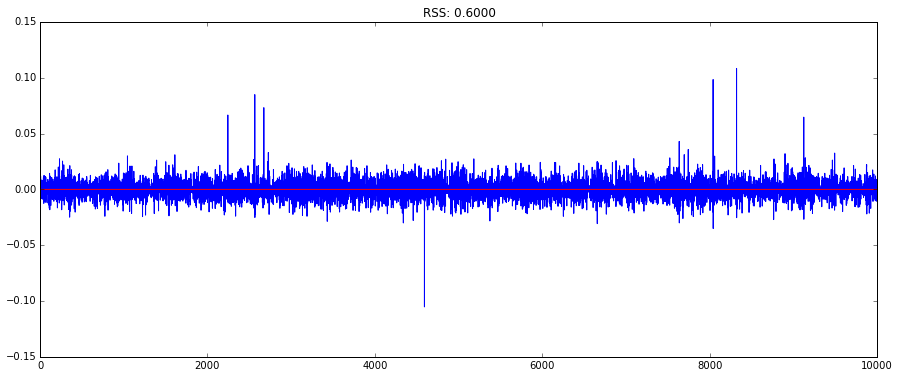

In [33]:
model = ARIMA(ts_log, order=(0, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

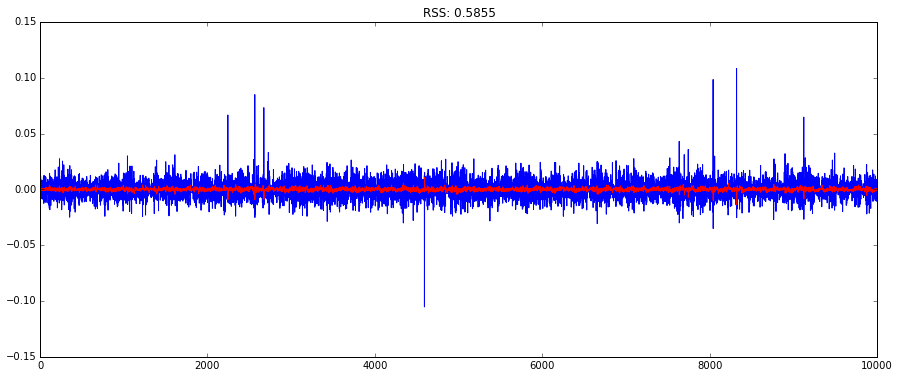

In [34]:
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

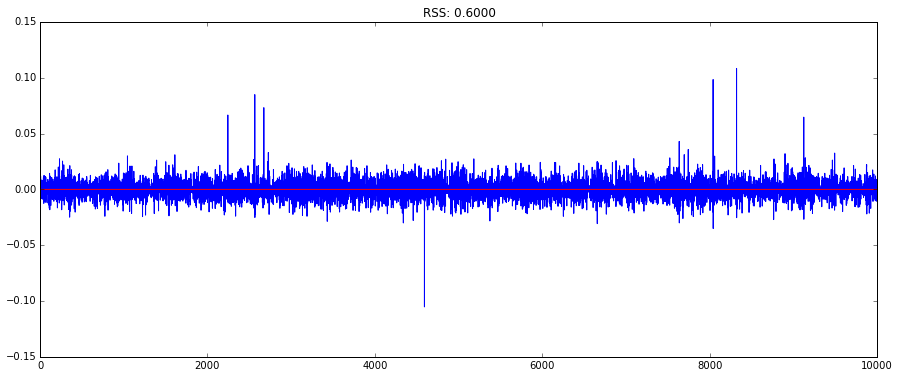

In [35]:
model = ARIMA(ts_log, order=(0, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [36]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Timestamp
2015-08-01 00:09:00   -0.000004
2015-08-01 00:14:00   -0.000004
2015-08-01 00:34:00   -0.000004
2015-08-01 00:39:00   -0.000004
2015-08-01 00:44:00   -0.000004
dtype: float64


In [37]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Timestamp
2015-08-01 00:09:00   -0.000004
2015-08-01 00:14:00   -0.000008
2015-08-01 00:34:00   -0.000013
2015-08-01 00:39:00   -0.000017
2015-08-01 00:44:00   -0.000021
dtype: float64


In [38]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Timestamp
2015-08-01 00:04:00    5.501122
2015-08-01 00:09:00    5.501118
2015-08-01 00:14:00    5.501114
2015-08-01 00:34:00    5.501110
2015-08-01 00:39:00    5.501105
dtype: float64

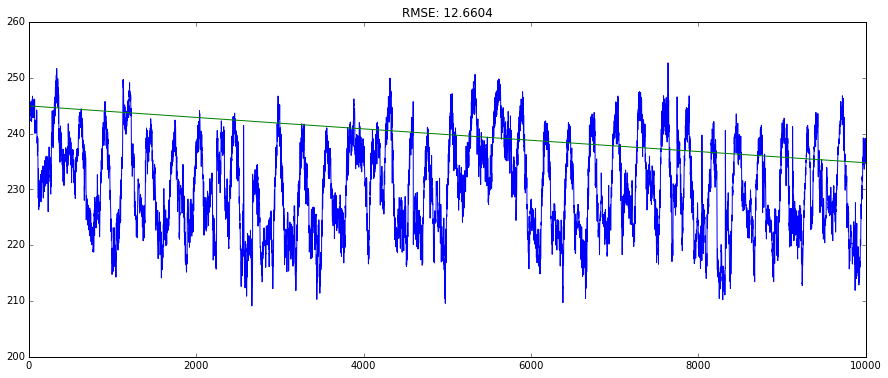

In [39]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))